In [1]:
%matplotlib notebook

#import ipywidgets as widgets
from matplotlib import cm, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# covariance arrays have tiny values, so per default the cov values are divided by 1000
def gaussian_bump(array, scale, mu, cov=np.identity(2)):
    # covariance: [[a,b],[c,d]] =^= ( a b \\ c d ) with (tht, phi) vectors 
    cov = np.array(cov)  # force cov to array for math operations
    tht_size, phi_size = array.shape
    tht, phi = np.linspace(0,1,tht_size), np.linspace(0,1,phi_size)
    Phi, Tht = np.meshgrid(phi, tht)
    vec_dist = np.array([Tht-mu[0], Phi-mu[1]]).transpose((1,2,0))
    cov_distance = np.sum(vec_dist * (vec_dist @ np.linalg.inv(cov.T)), axis=-1)
    norm_distr = np.exp(-1/2 * cov_distance)
    return array + norm_distr*scale

<IPython.core.display.Javascript object>


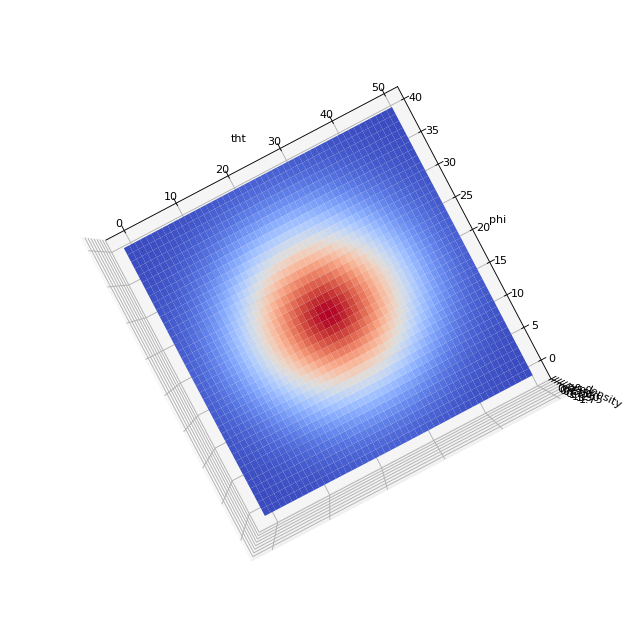

In [21]:
arr = np.ones((50,40))
#arr = gaussian_bump(arr, 1, [.5,.5], [[.045,-.0149], [-.0149,.015]])
arr = gaussian_bump(arr, 1, [.5,.5], [[.04,0], [0,0.04]])
#arr = arr / arr.sum(axis=0)

Tht, Phi = np.mgrid[:arr.shape[0], :arr.shape[1]]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("tht"); ax.set_ylabel("phi"); ax.set_zlabel("density")
ax.plot_surface(Tht, Phi, arr, cmap=cm.coolwarm)
ax.set_zlim(0,np.max(arr))
fig.tight_layout()

<IPython.core.display.Javascript object>


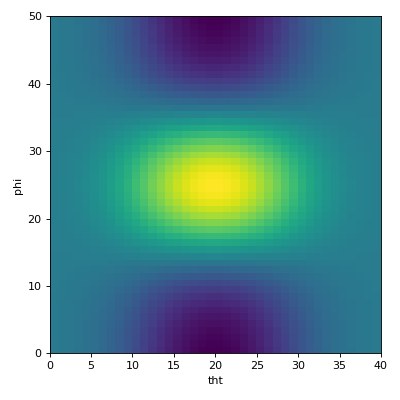

In [20]:
arr = np.ones((50,40))
#arr = gaussian_bump(arr, 1, [.5,.5], [[.045,-.0149], [-.0149,.015]])
arr = gaussian_bump(arr, 1, [.5,.5], [[.03,0], [0,0.03]])
arr = arr / arr.sum(axis=0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel("tht"); ax.set_ylabel("phi")
ax.pcolormesh(arr)
fig.tight_layout()
fig.show()

In [6]:
def multi_bump(size, scales=[], mus=[], covs=[], divide_cov_by_1000=True):
    assert(len(size) == 2)
    assert(len(scales) == len(mus) == len(covs))
    arr = np.ones(size)  # tht, phi
    for scale, mu, cov in zip(scales, mus, covs):
        # force cov to array for math operations
        cov = np.array(cov) / (1000 if divide_cov_by_1000 else 1) 
        arr = gaussian_bump(arr, scale, mu, cov)
    return arr

<IPython.core.display.Javascript object>


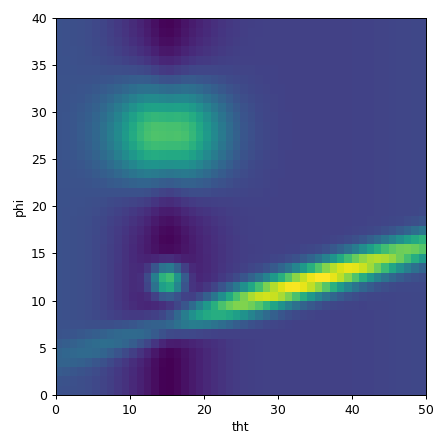

In [7]:
scales = [0.5] * 3
mus = [[.3, .3], [.7,.3], [.3,.7]]
covs = [[[1,0],[0,1]],
        [[10,0],[0,10]],
        [[10,30],[30,100]]]

arr = multi_bump((40, 50), scales, mus, covs)
arr = arr / arr.sum(axis=0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_xlabel("tht"); ax.set_ylabel("phi")
ax.pcolormesh(arr)
fig.tight_layout()
fig.show()

<IPython.core.display.Javascript object>


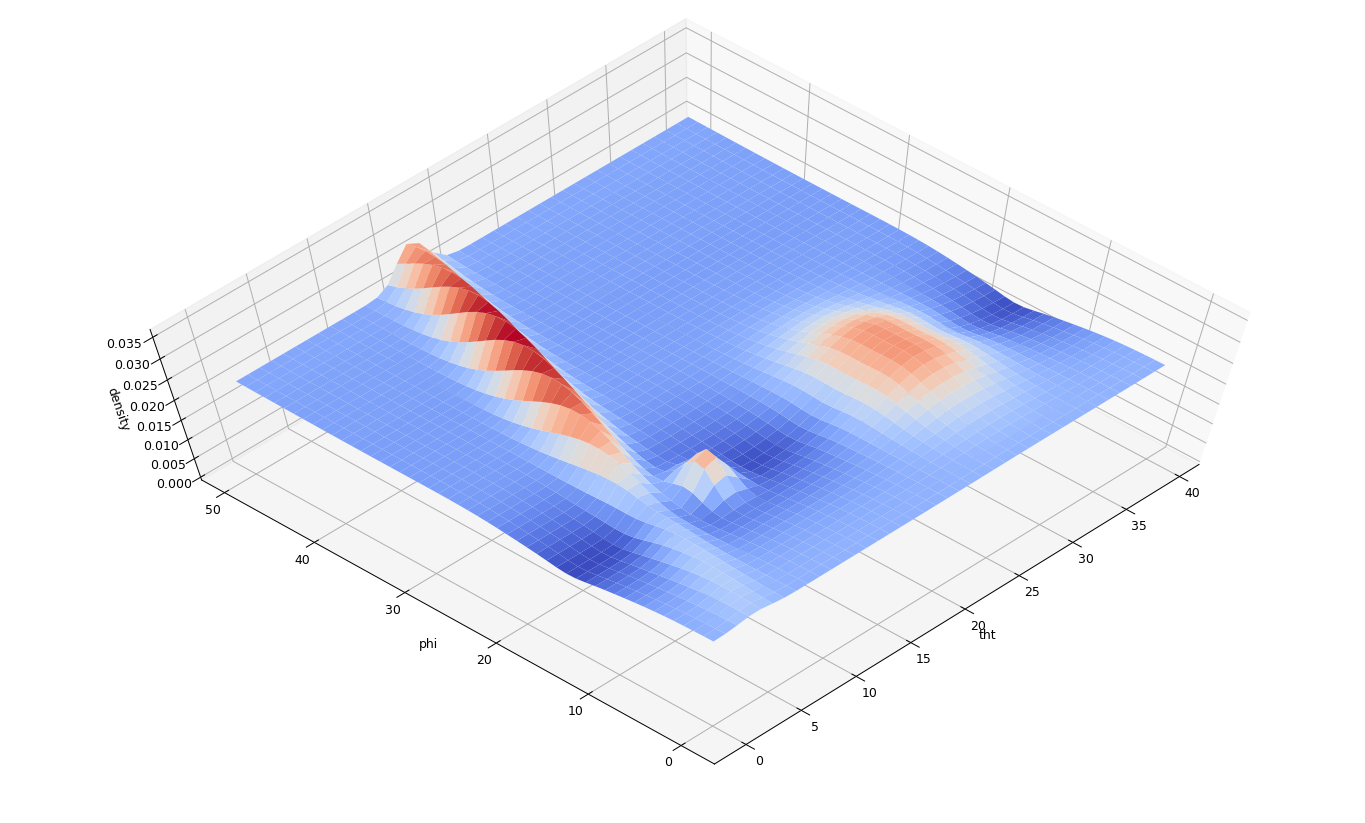

In [8]:
Tht, Phi = np.mgrid[:arr.shape[0], :arr.shape[1]]

plt.close("all")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("tht"); ax.set_ylabel("phi"); ax.set_zlabel("density")
ax.plot_surface(Tht, Phi, arr, cmap=cm.coolwarm)
ax.set_zlim(0,np.max(arr))
fig.tight_layout()